# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('petrol.csv')
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

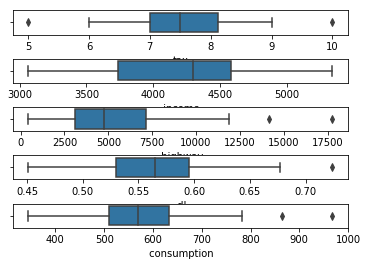

In [98]:
fig, ax = plt.subplots(len(df.columns),1)
plt.subplots_adjust(hspace = 1)
c=0
for cols in df.columns:
    sns.boxplot(df[cols],ax = ax[c])
    c +=1

> Outlier are clearly visisble

In [99]:
## Remove outliers
iqr = df.quantile(0.75) - df.quantile(0.25)
ul = df.quantile(0.75) + 1.5  * (iqr)
ll = df.quantile(0.75) - 1.5 * (iqr)

for cols in df.columns:
    df[cols].replace(to_replace=df[cols][df[cols]>ul[cols]],value=ul[cols], inplace = True)
    df[cols].replace(to_replace=df[cols][df[cols]<ll[cols]], value=ll[cols], inplace = True)

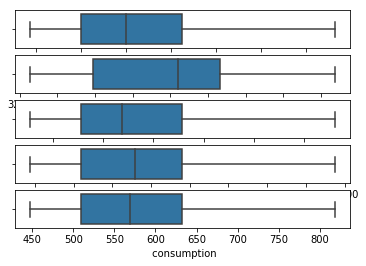

In [103]:
fig, ax = plt.subplots(len(df.columns),1)
c=0
for cols in df.columns:
    sns.boxplot(df[cols],ax = ax[c])
    c +=1

> Outliers have been removed

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

                   tax    income   highway        dl   consumption
tax           1.000000  0.014810 -0.463128 -0.303534     -0.498279
 income       0.014810  1.000000  0.066718  0.191786     -0.257752
 highway     -0.463128  0.066718  1.000000 -0.035072      0.047088
 dl          -0.303534  0.191786 -0.035072  1.000000      0.672286
 consumption -0.498279 -0.257752  0.047088  0.672286      1.000000


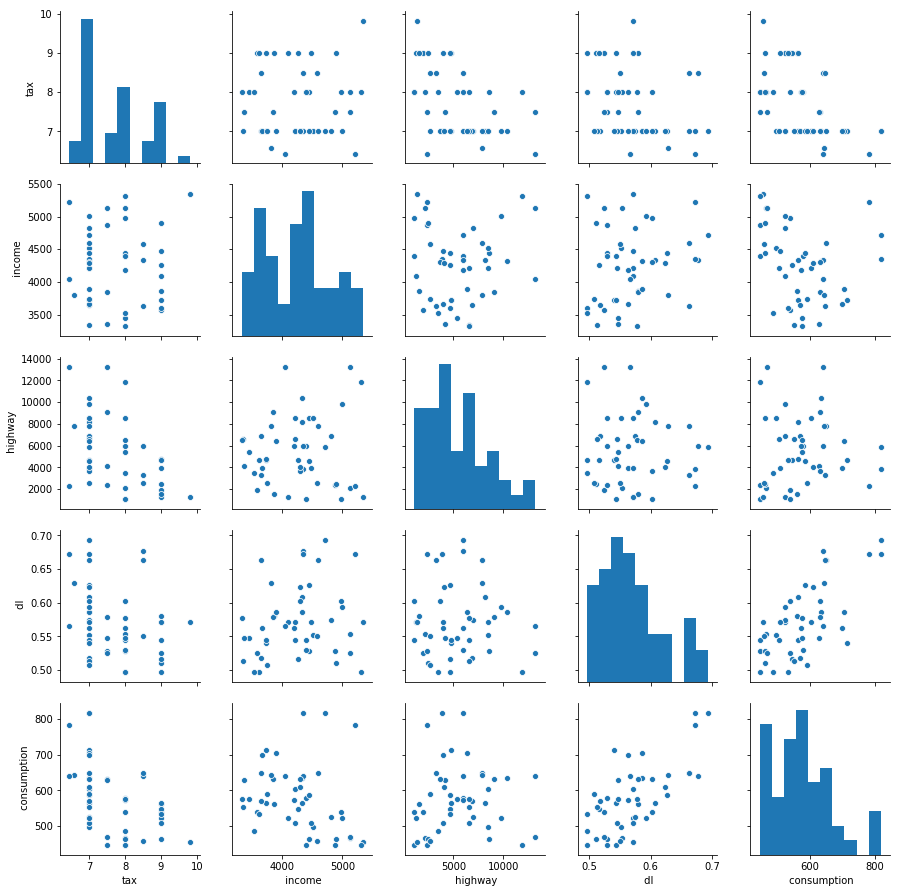

In [109]:
print (df.corr())
sns.pairplot(df)
plt.show()

> Answer: Both Corr functiona and Pair plot shows that there is a positive correlation between 'Consumption' and 'Population with DL'
There is also a negative correlation beetween 'Consumption' and 'Tax' but it is not very strong

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [218]:
X = df.iloc[:,:-1] # All coulmns except last
y = df.iloc[:,-1:] # Last column

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [220]:
print ("Shape of X, Train = {0} and Test = {1}".format(X_train.shape,X_test.shape))
print ("Shape of Y, Train = {0} and Test = {1}".format(y_train.shape,y_test.shape))

Shape of X, Train = (38, 4) and Test = (10, 4)
Shape of Y, Train = (38, 1) and Test = (10, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [221]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
coff = regr.coef_
data = {'col_name': X.columns , 'coff': coff[0]}
coff_df = pd.DataFrame(data = data)
print (coff_df)

   col_name         coff
0       tax   -47.910041
1    income    -0.063149
2   highway    -0.004298
3        dl  1271.004255


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [223]:
y_pred = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

varinace = r2_score(y_test, y_pred)

In [224]:
print("Root Mean squared error: %.2f" % rmse)
print('Variance score: %.4f' % varinace)

Root Mean squared error: 60.73
Variance score: 0.3475


In [225]:
print ("Accuracy of model on Training set = %.2f%%" %(regr.score(X_train,y_train)*100))
print ("Accuracy of model on Test set = %.2f%%" %(regr.score(X_test,y_test)*100))

Accuracy of model on Training set = 70.91%
Accuracy of model on Test set = 34.75%


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [226]:
X = df.iloc[:,[1,2]] # Taking only two feature in X as per above instruction 

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print ("Shape of X, Train = {0} and Test = {1}".format(X_train.shape,X_test.shape))
print ("Shape of Y, Train = {0} and Test = {1}".format(y_train.shape,y_test.shape))

Shape of X, Train = (38, 2) and Test = (10, 2)
Shape of Y, Train = (38, 1) and Test = (10, 1)


# Question 9: Print the coefficients of the multilinear regression model

In [228]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [229]:
coff = regr.coef_
data = {'col_name': X.columns , 'coff': coff[0]}
coff_df = pd.DataFrame(data = data)
print (coff_df)

   col_name      coff
0    income -0.025859
1   highway  0.001347


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [230]:
y_pred = regr.predict(X_test)

In [231]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
varinace = r2_score(y_test, y_pred)
print("Root Mean squared error: %.2f" % rmse)
print('Variance score: %.4f' % varinace)

Root Mean squared error: 70.92
Variance score: 0.1103


> Very low R Squared shows that Variation of 'Consupmtion' cannot be explained by selected features i.e. Income and Highway. It was obvious as in  earlier corr between variables both income and highay displayed very low correlation with 'Consumption'